## U.S. Births for Each Day of the Week from 1994 - 2003

In this project, I'll be working with the data set from the Centers for Disease Control and Prevention's National Center for Health Statistics to tally the births for each corresponding day of the week from 1994 - 2003.

The data set has the following structure:

 - year - Year
 - month - Month
 - date_of_month - Day number of the month
 - day_of_week - Day of week, where 1 is Monday and 7 is Sunday
 - births - Number of births
 


### Open the CSV file in read mode and assign to a variable.

In [1]:
f = open("births.csv").read()

### Split the data on the new-line character to create a list of lists and assign to a variable.

In [2]:
rows = f.split("\n")    

### Create a new dictionary and add extracted values from day of the week and corresponding total births for that day to the dictionary. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import collections

days_counts = {}

rows_no_header = rows[1:]
for row in rows_no_header:
    split_row = row.split(",")
    dow = split_row[3]
    births = int(split_row[4])
    if dow in days_counts:
        days_counts[dow] = days_counts[dow] + births
    else:
        days_counts[dow] = births

# created new dictionary of days of the week as key sorted by numbered value to create an index
day_names = {'Monday': '1', 'Tuesday': '2', 'Wednesday': '3', 'Thursday': '4', 'Friday': '5', 'Saturday': '6', 'Sunday': '7'}

# turned 'day_names' and 'days_counts' dictionaries into a sorted OrderedDict
sorted_dn = collections.OrderedDict(sorted(day_names.items(), key=lambda x: x[1]))
sorted_dc = collections.OrderedDict(sorted(days_counts.items(), key=lambda x: x[0]))

# used key from 'sorted_dn' and value from 'sorted_dc' to create a new OrderedDict
sorted_count = collections.OrderedDict((k, sorted_dc.get(v)) for k, v in sorted_dn.items() if v in sorted_dc)

print(sorted_dn)
print()
print(sorted_dc)
print()
print(sorted_count)

OrderedDict([('Monday', '1'), ('Tuesday', '2'), ('Wednesday', '3'), ('Thursday', '4'), ('Friday', '5'), ('Saturday', '6'), ('Sunday', '7')])

OrderedDict([('1', 5789166), ('2', 6446196), ('3', 6322855), ('4', 6288429), ('5', 6233657), ('6', 4562111), ('7', 4079723)])

OrderedDict([('Monday', 5789166), ('Tuesday', 6446196), ('Wednesday', 6322855), ('Thursday', 6288429), ('Friday', 6233657), ('Saturday', 4562111), ('Sunday', 4079723)])


### Total births for each day of the week from 1994 - 2003:
Monday: 5,789,166

Tuesday:	6,446,196

Wednesday:	6,322,855

Thursday:	6,288,429

Friday:	    6,233,657

Saturday:	4,562,111

Sunday:	    4,079,723


### Bar chart showing counts by days of the week


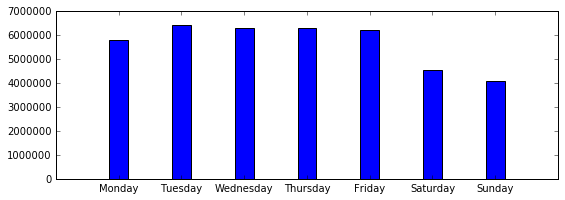

In [4]:
plt.subplots(figsize=(9, 3))
plt.bar(range(len(sorted_count)), list(sorted_count.values()), align='center', width=0.3)
plt.xticks(range(len(sorted_count)), list(sorted_count.keys()))
plt.show()
